In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from scipy.ndimage import gaussian_filter1d

Air_Quality_Aotizhongxin = pd.read_csv('./air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
print(Air_Quality_Aotizhongxin.shape)
Air_Quality_Aotizhongxin.dropna(axis=0, inplace=True,how = 'any')
Air_Quality_Aotizhongxin['date'] = pd.to_datetime(Air_Quality_Aotizhongxin['year'].astype(str) + '-'
                                                   +Air_Quality_Aotizhongxin['month'].astype(str)+ '-' 
                                                   +Air_Quality_Aotizhongxin['day'].astype(str))
Air_Quality_Aotizhongxin.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

<Axes: xlabel='date', ylabel='PRES'>

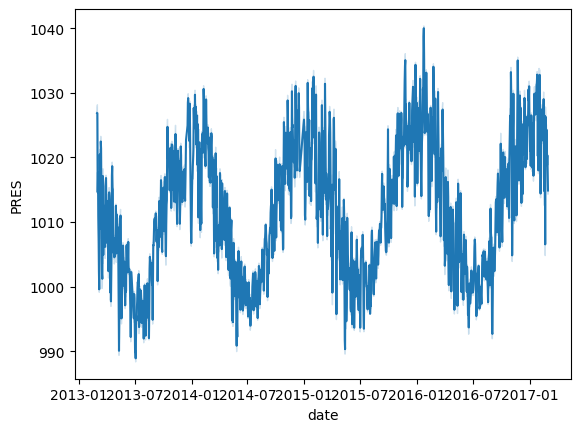

In [3]:
#看看压强和时间的关系
pressure = Air_Quality_Aotizhongxin.groupby(['date','hour'])['PRES'].mean().reset_index()
sns.lineplot(x='date', y='PRES', data=pressure)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='date', ylabel='RAIN'>

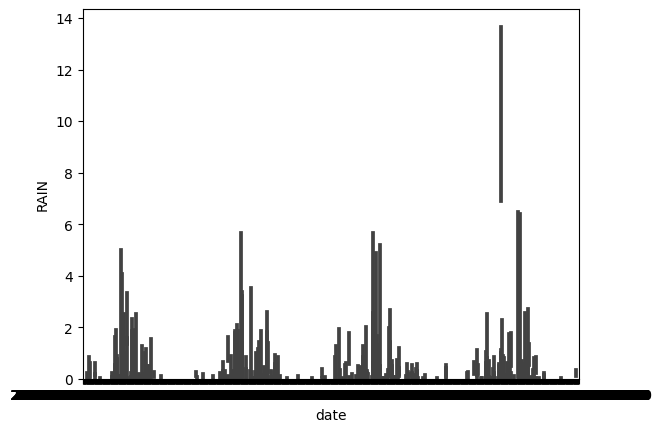

In [4]:
#看看降水和时间的关系
rain = Air_Quality_Aotizhongxin.groupby(['date','hour'])['RAIN'].mean().reset_index()
sns.barplot(x='date', y='RAIN', data=rain)

Now we want to know if there's any hidden relations between pollutants and pressure or rain.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

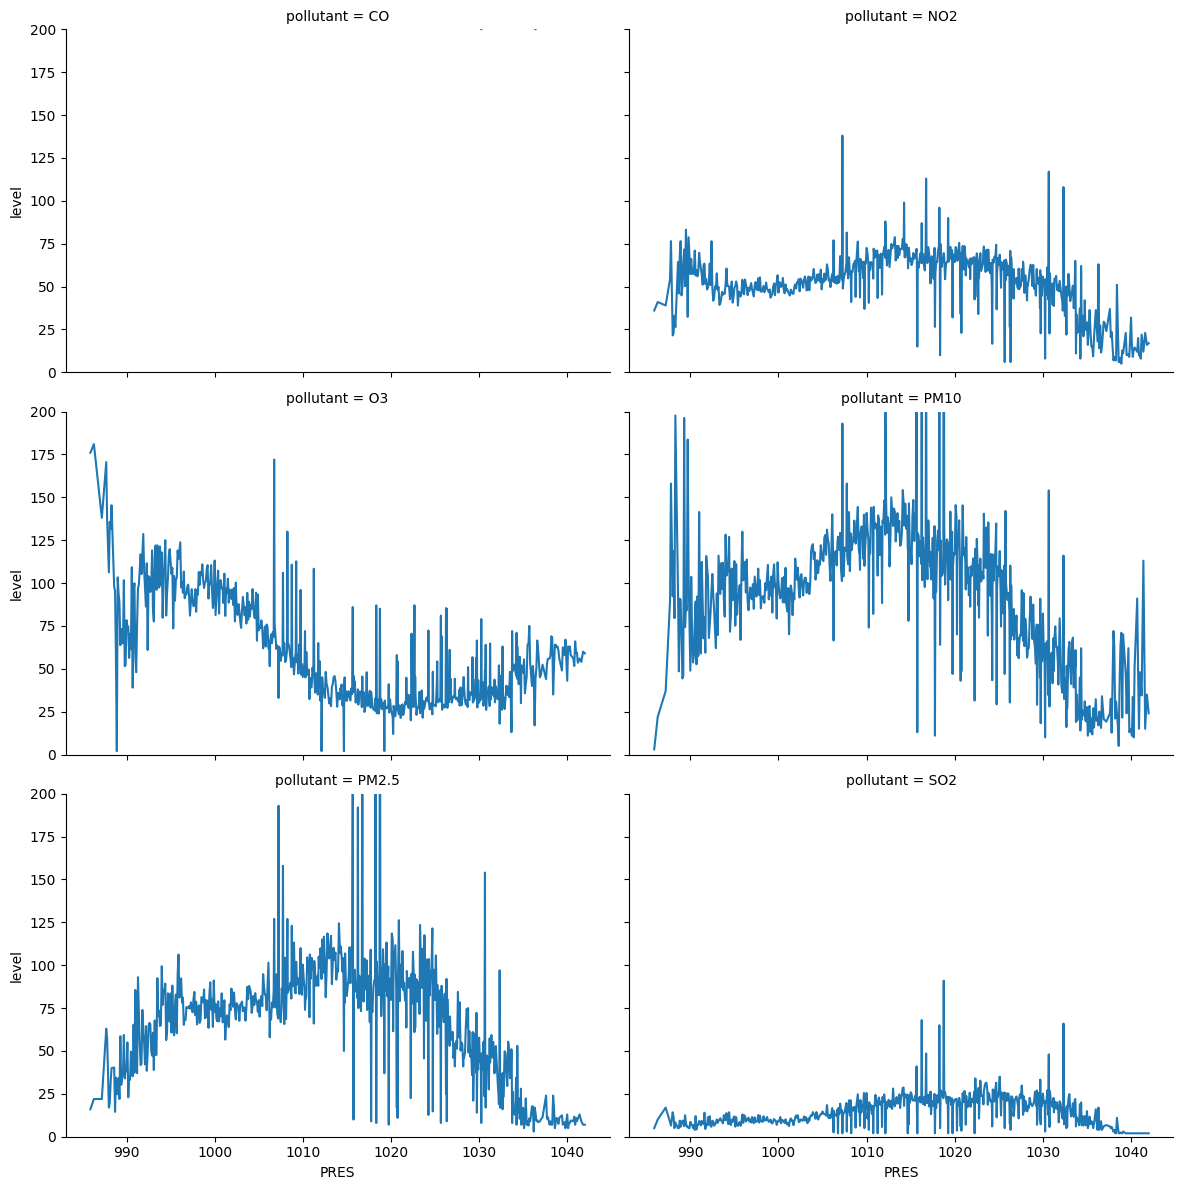

In [5]:
relation_of_pressure = Air_Quality_Aotizhongxin.melt(id_vars='PRES', value_vars=['PM2.5', 'PM10', 'NO2', 'SO2','CO', 'O3'], var_name='pollutant', value_name='level')
# 计算每个压力值下的污染物平均值
average_pollutants_under_pressure = relation_of_pressure.groupby(['PRES', 'pollutant'])['level'].mean().reset_index()

# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_pressure, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'PRES', 'level')
g.set(ylim=(0, 200))

# 添加图例
g.add_legend()

The plot looks ugly, let's try to make it smooth.

C:\Users\PC\AppData\Local\Temp\ipykernel_18064\3553637852.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

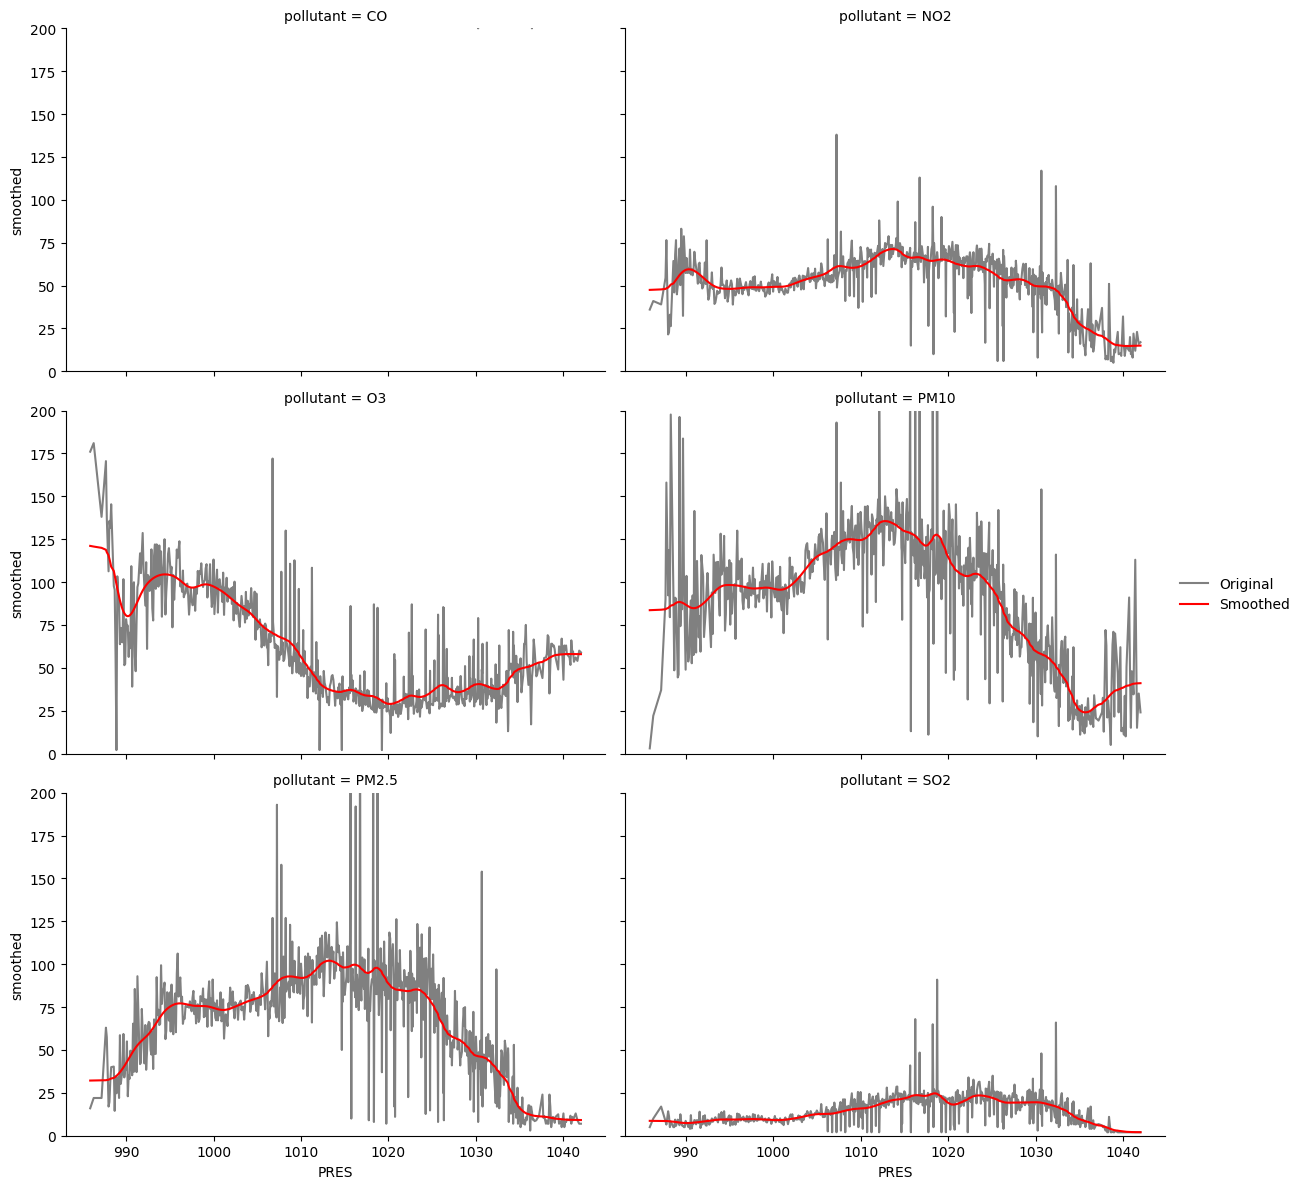

In [6]:
from scipy.ndimage.filters import gaussian_filter1d

# 对每种污染物的数据应用 gaussian_filter1d 函数
average_pollutants_under_pressure['smoothed'] = average_pollutants_under_pressure.groupby('pollutant')['level'].transform(lambda x: gaussian_filter1d(x, sigma=10))

# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_pressure, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'PRES', 'level', color='grey', label='Original')

# 绘制平滑后的数据的线图
g.map(sns.lineplot, 'PRES', 'smoothed', color='red', label='Smoothed')
g.set(ylim=(0, 200))

# 添加图例
g.add_legend()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

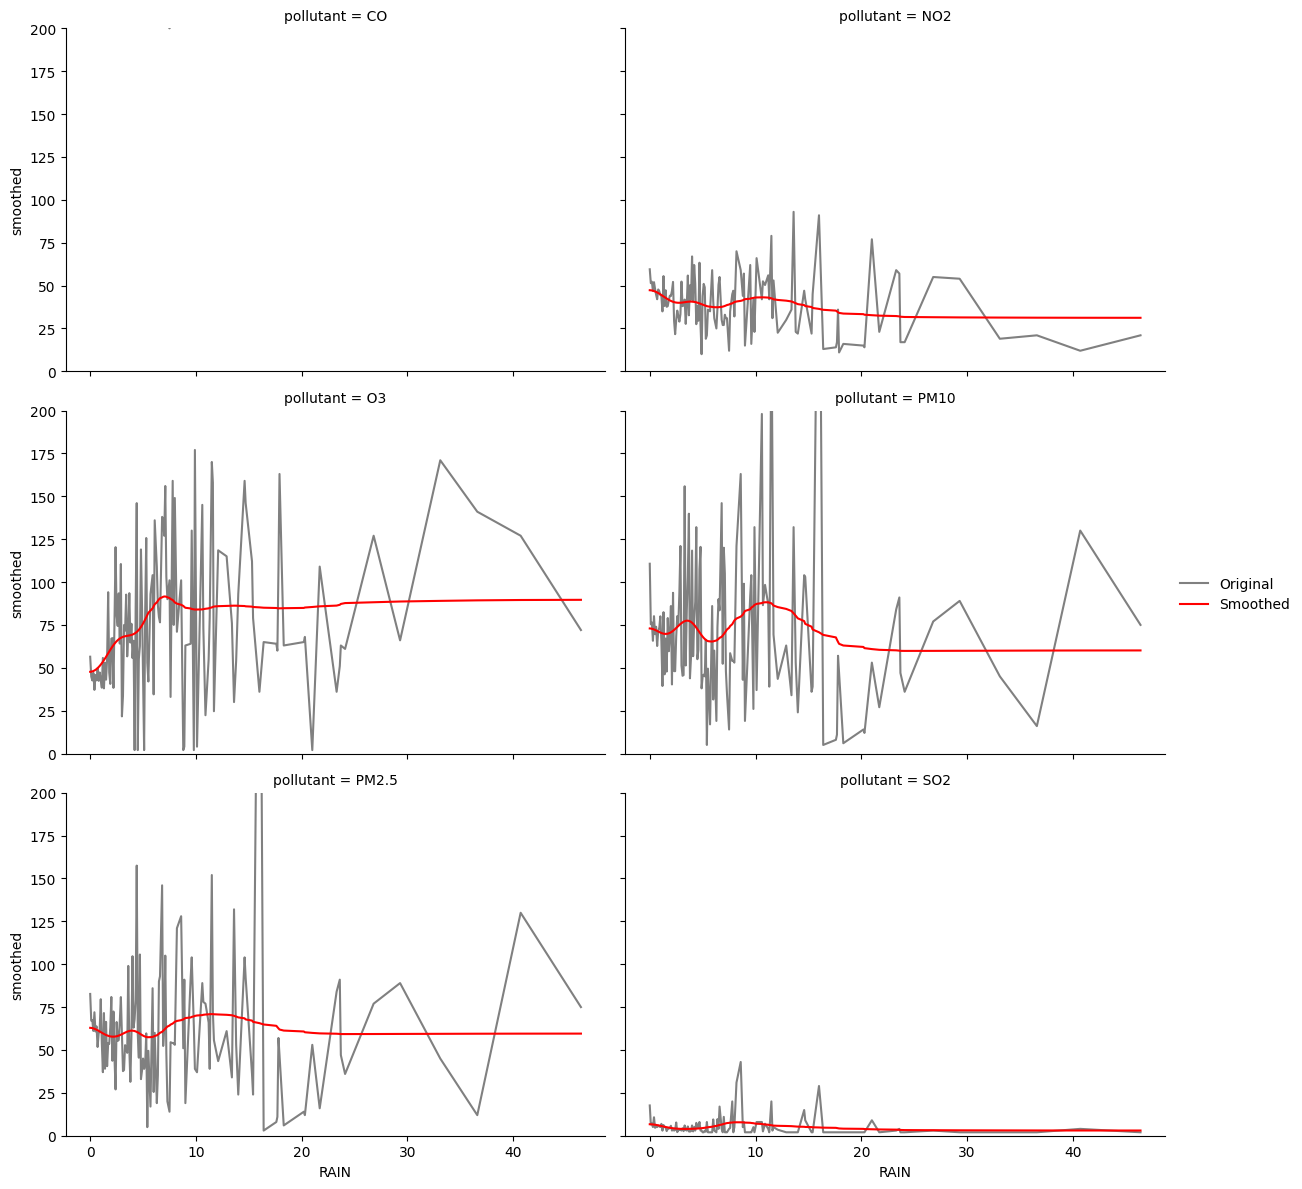

In [7]:
relation_of_rain = Air_Quality_Aotizhongxin.melt(id_vars='RAIN', value_vars=['PM2.5', 'PM10', 'NO2', 'SO2','CO', 'O3'], var_name='pollutant', value_name='level')

average_pollutants_under_rain = relation_of_rain.groupby(['RAIN', 'pollutant'])['level'].mean().reset_index()
average_pollutants_under_rain['smoothed'] = average_pollutants_under_rain.groupby('pollutant')['level'].transform(lambda x: gaussian_filter1d(x, sigma=10))
# 创建 FacetGrid
g = sns.FacetGrid(average_pollutants_under_rain, col='pollutant', col_wrap=2, height=4, aspect=1.5)

# 绘制线图
g.map(sns.lineplot, 'RAIN', 'level', color='grey', label='Original')

# 绘制平滑后的数据的线图
g.map(sns.lineplot, 'RAIN', 'smoothed', color='red', label='Smoothed')
g.set(ylim=(0, 200))
# 添加图例
g.add_legend()

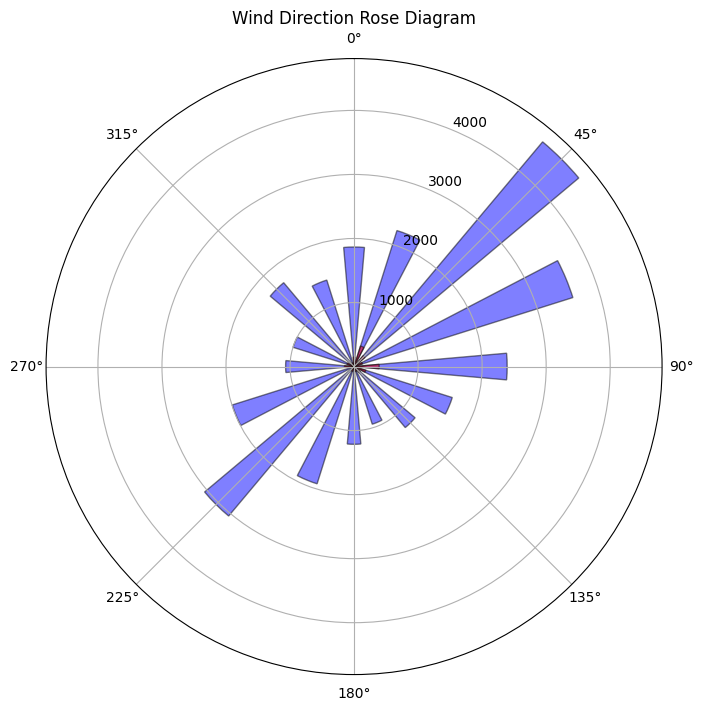

In [11]:
# 定义一个字典，将方向转换为角度
direction_dict = {'N': 0, 'NNE':22.5,'NE': 45, 'ENE':67.5,
                  'E': 90, 'ESE':112.5,'SE': 135,'SSE':157.5, 
                  'S': 180, 'SSW':202.5,'SW': 225,'WSW':247.5, 
                  'W': 270,'WNW':292.5, 'NW': 315,'NNW':337.5}

# 将 'wd' 列中的方向转换为角度
wind_direction_deg = Air_Quality_Aotizhongxin['wd'].map(direction_dict)

# 计算每个风向的频率
directions, frequencies = np.unique(wind_direction_deg, return_counts=True)

# 将风向转换为弧度
directions_rad = np.deg2rad(directions)

# 创建极坐标图
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# 绘制风向玫瑰图
ax.bar(directions_rad, frequencies, width=np.deg2rad(10), edgecolor='k', alpha=0.5, color='b')

# 设置标题和标签
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Direction Rose Diagram')

plt.show()

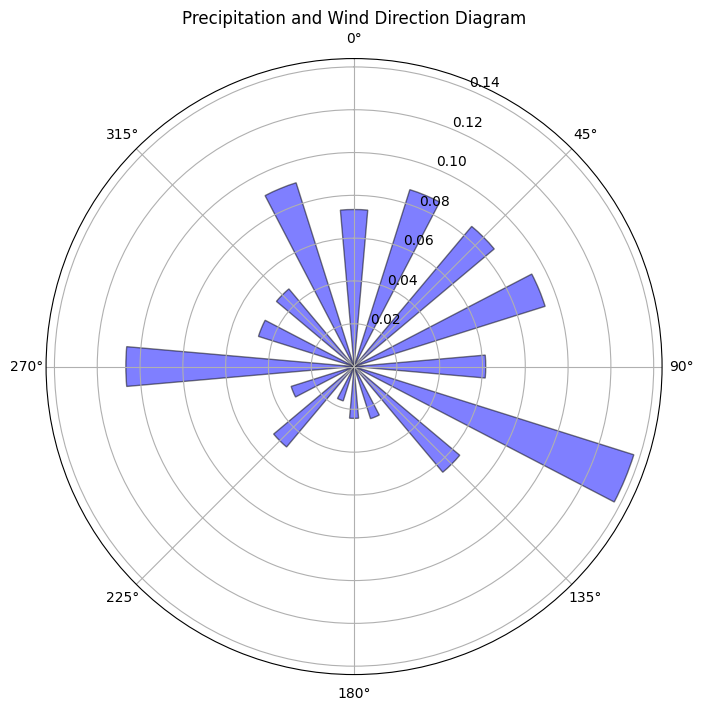

In [13]:
# 计算每个风向的降水量总和
precipitation_sum = Air_Quality_Aotizhongxin.groupby('wd')['RAIN'].mean()

# 将 'wd' 列中的方向转换为角度
wind_direction_deg = precipitation_sum.index.map(direction_dict)

# 将风向转换为弧度
directions_rad = np.deg2rad(wind_direction_deg)

# 创建极坐标图
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# 绘制降水量和风向的图
ax.bar(directions_rad, precipitation_sum, width=np.deg2rad(10), edgecolor='k', alpha=0.5, color='b')

# 设置标题和标签
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Precipitation and Wind Direction Diagram')

plt.show()

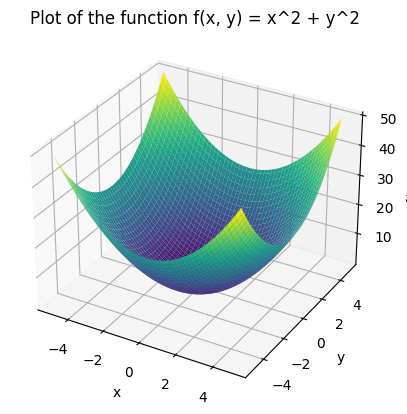

C:\Users\PC\AppData\Local\Temp\ipykernel_18064\2775109881.py:34: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(z - x**2)


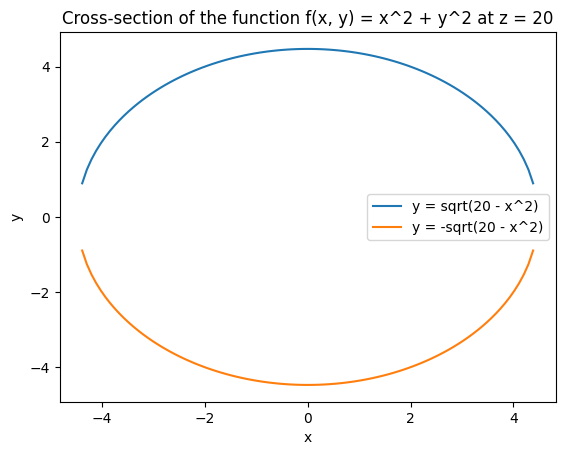

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义 x, y 的值
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# 定义函数
z = x**2 + y**2

# 创建 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制函数的图像
ax.plot_surface(x, y, z, cmap='viridis')

# 设置标题和标签
ax.set_title("Plot of the function f(x, y) = x^2 + y^2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# 显示图形
plt.show()

# 定义 z 的值
z = 20

# 计算对应的 x, y 的值
x = np.linspace(-np.sqrt(z), np.sqrt(z), 100)
y = np.sqrt(z - x**2)

# 创建图形
fig, ax = plt.subplots()

# 绘制横截面的图像
ax.plot(x, y, label='y = sqrt(20 - x^2)')
ax.plot(x, -y, label='y = -sqrt(20 - x^2)')

# 设置标题和标签
ax.set_title("Cross-section of the function f(x, y) = x^2 + y^2 at z = 20")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

# 显示图形
plt.show()